# Policy Briefing Title that Matches PDF Title

## CASA0013: Foundations of Spatial Data Science

### Student Ids: ucftXXXX, ucftYYYY, etc.

### Import Required Libraries

Before everything, import libraries that will be used to run the following code

In [1]:
import os
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from requests import get
import geopandas as gpd
import seaborn as sns

## 1. Loading Data

### 1.1 Reading and writing data

We select four years of Inside Airbnb data from 2019 to 2022 for analysing the impacts of Covid-19.

All these data are from gzip compressed files, so extraction is needed.

In [2]:
# set a function for caching data
def cache_data(src: str, dest: str) -> str:
    """
    Downloads and caches a remote file locally.
    
    This will save it locally with the remote files and can check if it already exists, 
    so you don't need to download by yourself and won't do it twice.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
        
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src)  # to combine the components back into a valid URL string
    fn = os.path.split(url.path)[-1]  # Extract the filename
    dfn = os.path.join(dest, fn)  # Destination filename

    if not os.path.isfile(dfn):

        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest)

        if len(path) >= 1 and path[0] != "":
            os.makedirs(os.path.join(*path), exist_ok=True)

        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)

        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

The function above allows us to combine components for a vaid URL.
For example, if datasets are all from a same website, so the source path will be the same, the only difference is the follwing downloading parts, see code below.

In [3]:
# set the destination directory for data to download in
ddir = os.path.join("data", "insideairbnb")
# source path
spath = "https://orca.casa.ucl.ac.uk/~jreades/data/"

# download Airbnb data in 2019, 2020, 2021, and 2022, (ab is short as airbnb)
ab19 = pd.read_csv(
    cache_data(spath + "London-2019-11-listings.csv.gz", ddir),
    compression="gzip",
    low_memory=False,
)
ab20 = pd.read_csv(
    cache_data(spath + "London-2020-11-listings.csv.gz", ddir),
    compression="gzip",
    low_memory=False,
)
ab21 = pd.read_csv(
    cache_data(spath + "London-2021-10-listings.csv.gz", ddir),
    compression="gzip",
    low_memory=False,
)
# also can use the link directly
ab22 = pd.read_csv(
    cache_data(
        "http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/data/listings.csv.gz",
        ddir,
    ),
    compression="gzip",
    low_memory=False,
)
print("Done.")

Found data/insideairbnb/London-2019-11-listings.csv.gz locally!
Found data/insideairbnb/London-2020-11-listings.csv.gz locally!
Found data/insideairbnb/London-2021-10-listings.csv.gz locally!
Found data/insideairbnb/listings.csv.gz locally!
Done.


### 1.2 Basic Overview of the data

Here, we set randomly five rows for a quick overview, and check if there are any duplicated rows.

In [4]:
# define a function for basic overview
def overview(df):
    print()
    # check if there are duplicate rows and drop them
    if df.duplicated().sum() > 0:
        print(f"There are {df.duplicated().sum()} duplicated rows")
        df.drop_duplicates(inplace=True, ignore_index=True)
        print("These duplicated columns are dropped.")
    else:
        print("There is no duplicated rows.")
    print(f"Data frame is {df.shape[0]:,} rows x {df.shape[1]} columns")
    print("\n")
    print("Basic Overview")
    df.info()

    print("\n")
    print("Random rows for a quick view")
    display(df.sample(5))

In [5]:
# have basic overviews of the data
overview(ab19)


There are 155 duplicated rows
These duplicated columns are dropped.
Data frame is 85,081 rows x 18 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85081 entries, 0 to 85080
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              85081 non-null  object
 1   name                            85081 non-null  object
 2   host_id                         85081 non-null  object
 3   host_name                       85081 non-null  object
 4   neighbourhood_group             85081 non-null  object
 5   neighbourhood                   85081 non-null  object
 6   latitude                        85081 non-null  object
 7   longitude                       85081 non-null  object
 8   room_type                       85081 non-null  object
 9   price                           85081 non-null  object
 10  minimum_nights                  85081 non

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_class,last_review_timestamp
44207,29174026,charming garden flat close to crystal palace park,128816328,Matthew,,Bromley,51.41607,-.0682,Entire home/apt,80,7,4,2019-05-16,.33,1,152,Entire home/apt,5/16/2019 0:00:00
6319,21262781,LONDON STUDIO 3,153752019,Marcin,,Ealing,51.50201,-.25562,Entire home/apt,75,1,38,2019-10-29,1.62,7,308,Entire home/apt,10/29/2019 0:00:00
65573,3978194,"Spacious, bright 2-bedroom flat in Paddington",20617681,Preeti,,Westminster,51.51097,-.18386,Private room,100,2,0,,,1,0,Private room,
31215,27199252,LARGE HOUSE- 1 DOUBLE SIZE ROOM @ £20 SLEEPS ONE,177014167,Felix,,Bexley,51.47675,.16532,Private room,20,2,12,2019-09-05,.89,2,171,Private room,9/5/2019 0:00:00
74777,27830525,Chambre privée à Clapham zone 2,27359648,Myriam,,Wandsworth,51.46269,-.17642,Private room,70,2,0,,,1,179,Private room,


There is a problem with the data type 'Dtype': all of them are objects, but in fact there should be float and integer. We will not make changes here because the data source is too huge. 
Instead, we will solve this problem after selecting the required columns deal with.

In [6]:
overview(ab20)


There is no duplicated rows.
Data frame is 76,984 rows x 74 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76984 entries, 0 to 76983
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            76984 non-null  int64  
 1   listing_url                                   76984 non-null  object 
 2   scrape_id                                     76984 non-null  int64  
 3   last_scraped                                  76984 non-null  object 
 4   name                                          76961 non-null  object 
 5   description                                   73931 non-null  object 
 6   neighborhood_overview                         47836 non-null  object 
 7   picture_url                                   76984 non-null  object 
 8   host_id                                       7698

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
10684,8961676,https://www.airbnb.com/rooms/8961676,20201106040109,2020-11-06,Gorgeous 1st floor flat 5 mins from tube,"Lovely, spacious and sunny flat 5 minutes walk...",10 minutes walk from cool bar and cafes in Ken...,https://a0.muscache.com/pictures/d5fbfa21-55ae...,16045726,https://www.airbnb.com/users/show/16045726,...,9.0,8.0,9.0,NaN,f,1,1,0,0,0.20
67097,41992365,https://www.airbnb.com/rooms/41992365,20201106040109,2020-11-07,Modern 2 Bedroom Flat in East London near Hackney,Modern and well decorated 2 bedroom flat in th...,This is a modern flat in a new and stylish blo...,https://a0.muscache.com/pictures/a8b2ef8a-0a00...,21442244,https://www.airbnb.com/users/show/21442244,...,NaN,NaN,NaN,NaN,f,1,1,0,0,0.13
40325,27054001,https://www.airbnb.com/rooms/27054001,20201106040109,2020-11-06,Beautiful light-filled apartment in amazing area,"Beautiful, light-filled apartment next to Kent...",NaN,https://a0.muscache.com/pictures/15009e39-6427...,131388521,https://www.airbnb.com/users/show/131388521,...,10.0,10.0,9.0,NaN,t,1,0,1,0,0.22
36430,24407317,https://www.airbnb.com/rooms/24407317,20201106040109,2020-11-06,Prime Kensington Flat Overlooking a Communal G...,Fold back wooden shutters on a row of tall win...,"The apartment is in Lexham Gardens, a quiet gr...",https://a0.muscache.com/pictures/a2c4c852-0932...,168303556,https://www.airbnb.com/users/show/168303556,...,8.0,10.0,8.0,NaN,t,5,4,0,0,0.09
18757,14669754,https://www.airbnb.com/rooms/14669754,20201106040109,2020-11-06,Luxury home. Cosy room. London yea!,You’ll love my place because of the easy acces...,NaN,https://a0.muscache.com/pictures/ce9a6901-9171...,39914453,https://www.airbnb.com/users/show/39914453,...,10.0,10.0,9.0,NaN,f,2,0,2,0,0.43


In [7]:
overview(ab21)


There is no duplicated rows.
Data frame is 70,617 rows x 74 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70617 entries, 0 to 70616
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            70617 non-null  int64  
 1   listing_url                                   70617 non-null  object 
 2   scrape_id                                     70617 non-null  int64  
 3   last_scraped                                  70617 non-null  object 
 4   name                                          70593 non-null  object 
 5   description                                   67718 non-null  object 
 6   neighborhood_overview                         42021 non-null  object 
 7   picture_url                                   70617 non-null  object 
 8   host_id                                       7061

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
64378,49282348,https://www.airbnb.com/rooms/49282348,20210909211636,2021-09-09,3 Bedroom family house next to park,"The house is located in a quiet, family friend...",An area that is both urban and green with good...,https://a0.muscache.com/pictures/7abcae0b-da2d...,45705071,https://www.airbnb.com/users/show/45705071,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2909,3071519,https://www.airbnb.com/rooms/3071519,20210909211636,2021-09-11,Wimbledon Tennis Double Ensuite Bedroom,A VERY SPACIOUS DOUBLE BEDROOM CLOSE TO WIMBLE...,"Coronation Gardens is opposite the house, and ...",https://a0.muscache.com/pictures/108384538/164...,14359221,https://www.airbnb.com/users/show/14359221,...,4.25,4.25,3.75,NaN,f,1,0,1,0,0.08
69088,51480514,https://www.airbnb.com/rooms/51480514,20210909211636,2021-09-11,Kind Studio in the Prestigious Chelsea,I am happy to invite you to my professionally ...,The studio flat is located in the newly built ...,https://a0.muscache.com/pictures/e0e79322-0c0a...,304435753,https://www.airbnb.com/users/show/304435753,...,NaN,NaN,NaN,NaN,t,5,5,0,0,NaN
56758,42985725,https://www.airbnb.com/rooms/42985725,20210909211636,2021-09-11,Room at the lux Inn,Room available with en-suite bathroom for lon...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,98151795,https://www.airbnb.com/users/show/98151795,...,5.00,5.00,5.00,NaN,t,2,0,2,0,0.12
42252,32974483,https://www.airbnb.com/rooms/32974483,20210909211636,2021-09-11,Zone 1-2 Family/group room. Central London,"Large room suitable for groups or families, si...",NaN,https://a0.muscache.com/pictures/f3247930-0c8d...,35754291,https://www.airbnb.com/users/show/35754291,...,5.00,5.00,5.00,NaN,f,5,0,5,0,0.09


In [8]:
overview(ab22)


There is no duplicated rows.
Data frame is 69,351 rows x 75 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69351 non-null  int64  
 1   listing_url                                   69351 non-null  object 
 2   scrape_id                                     69351 non-null  int64  
 3   last_scraped                                  69351 non-null  object 
 4   source                                        69351 non-null  object 
 5   name                                          69330 non-null  object 
 6   description                                   67832 non-null  object 
 7   neighborhood_overview                         39964 non-null  object 
 8   picture_url                                   6935

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
45741,46046655,https://www.airbnb.com/rooms/46046655,20220910194334,2022-09-11,city scrape,Unique Apartment In Trendy Central Soho Piccad...,Unique Apartment In Trendy Central Soho Piccad...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,6881701,...,4.00,4.50,4.17,NaN,f,11,11,0,0,0.26
52335,53151428,https://www.airbnb.com/rooms/53151428,20220910194334,2022-09-11,city scrape,Luxury 2 Bedrooms Apartment - Woolwich Arsenal,Enjoy a stylish experience at this centrally-l...,NaN,https://a0.muscache.com/pictures/b207bf2c-e0d0...,298749323,...,4.25,4.13,4.25,NaN,t,3,1,2,0,0.98
56980,604297277254814880,https://www.airbnb.com/rooms/604297277254814880,20220910194334,2022-09-12,previous scrape,Airy 1-bed top floor flat in Dalston / Canonbury,An airy and light top-floor flat in a sensatio...,"Dalston is a vibrant area with lots of pubs, b...",https://a0.muscache.com/pictures/miso/Hosting-...,48313508,...,4.90,5.00,4.80,NaN,t,1,1,0,0,2.22
49817,51192693,https://www.airbnb.com/rooms/51192693,20220910194334,2022-09-11,city scrape,Surbiton modern 2 bedroom flat with parking,ASK ME ABOUT SPECIAL OFFERS DURING THE COVID P...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1794020,...,4.20,4.40,3.60,NaN,f,3,3,0,0,0.88
28226,27124246,https://www.airbnb.com/rooms/27124246,20220910194334,2022-09-11,city scrape,1 bed Newly Decorated Flat Stroll to Greenwich,NaN,NaN,https://a0.muscache.com/pictures/fee8558b-7eac...,165122633,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


## 2. Data Pre-processing

### Choosing columns for analysis

There are so many columns in each listing. Actually, we just need to select what will be used for analysis. And after that we can deal with na values, otherwise datasets are too big.

In [9]:
# select columns for analysis in each list
subset_cols = [
    "id",
    "host_id",
    "neighbourhood",
    "latitude",
    "longitude",
    "price",
    "minimum_nights",
]

Making subsets for each listing:

In [10]:
s_ab19 = ab19[subset_cols]
s_ab20 = ab20[subset_cols]
s_ab21 = ab21[subset_cols]
s_ab22 = ab22[subset_cols]

<div class="alert alert-block alert-warning"><b>Possible problem: wrong datatype</b> 

At the beginning, we've checked the data type of the four datasets and the other three are correct, only the datatypes in 2019 are wrong. So we will transform the selected 2019 data type here.</div>



In [11]:
s_ab19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85081 entries, 0 to 85080
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              85081 non-null  object
 1   host_id         85081 non-null  object
 2   neighbourhood   85081 non-null  object
 3   latitude        85081 non-null  object
 4   longitude       85081 non-null  object
 5   price           85081 non-null  object
 6   minimum_nights  85081 non-null  object
dtypes: object(7)
memory usage: 4.5+ MB


Now we are going to transform the data types into right types:

Select columns that should be numeric.
Assuming there are whitespaces leading or trailing the numbers, that's why they became 'object' data, so we will remove these spaces.

In [12]:
# these columns should be numeric
numeric_cols = ["id", "host_id", "price", "minimum_nights", "latitude", "longitude"]

for col in numeric_cols:
    s_ab19[col] = s_ab19[col].str.strip()  # str.strip() can remove leading and trailing characters
    s_ab19[col] = s_ab19[col].apply(pd.to_numeric)

s_ab19.info()

/tmp/ipykernel_5716/381426967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_ab19[col] = s_ab19[col].str.strip()  # str.strip() can remove leading and trailing characters
/tmp/ipykernel_5716/381426967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_ab19[col] = s_ab19[col].apply(pd.to_numeric)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85081 entries, 0 to 85080
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              85068 non-null  float64
 1   host_id         84912 non-null  float64
 2   neighbourhood   85081 non-null  object 
 3   latitude        84911 non-null  float64
 4   longitude       84911 non-null  float64
 5   price           84911 non-null  float64
 6   minimum_nights  84911 non-null  float64
dtypes: float64(6), object(1)
memory usage: 4.5+ MB


Still need fix some datatype, for example, 'id' should be integer instead of float.

# drop na value
s_ab19 = s_ab19.fillna(0)

# select integer columns
int_cols = ["id", "host_id", "price", "minimum_nights"]

for col in int_cols:
    s_ab19[col] = s_ab19[col].astype(int)

s_ab19.info()

Now they are all in right data type, the problem is fixed.
We can move to the following analysis parts.

In [14]:
# Creating histograms for all columns with numeric values to check their distributions and again check their datatype.
def numeric_cols_hist(data, width, height):
    print('Here, density of values in each numeric column is shown.')
    cols = data.select_dtypes(include=('number')).columns.to_list()
    data[cols].hist(bins=30, figsize=(width, height))
    plt.show()

Here, density of values in each numeric column is shown.


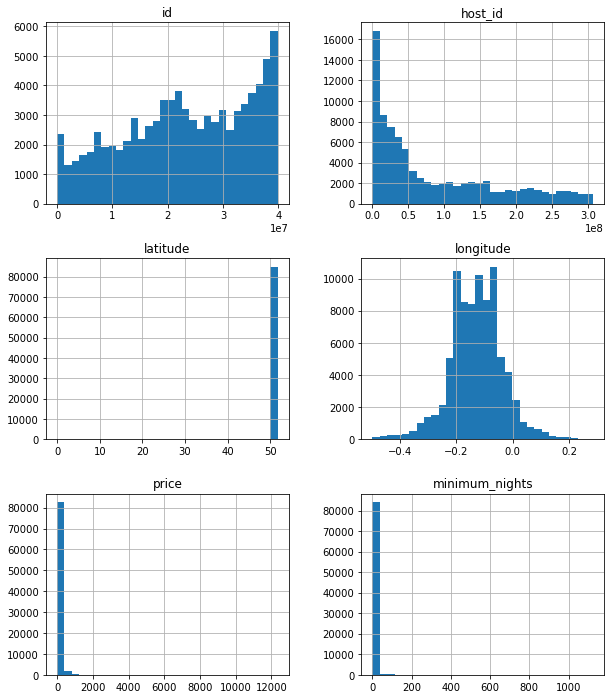

In [15]:
# check for 2019
numeric_cols_hist(s_ab19, width=10, height=12)

Here, density of values in each numeric column is shown.


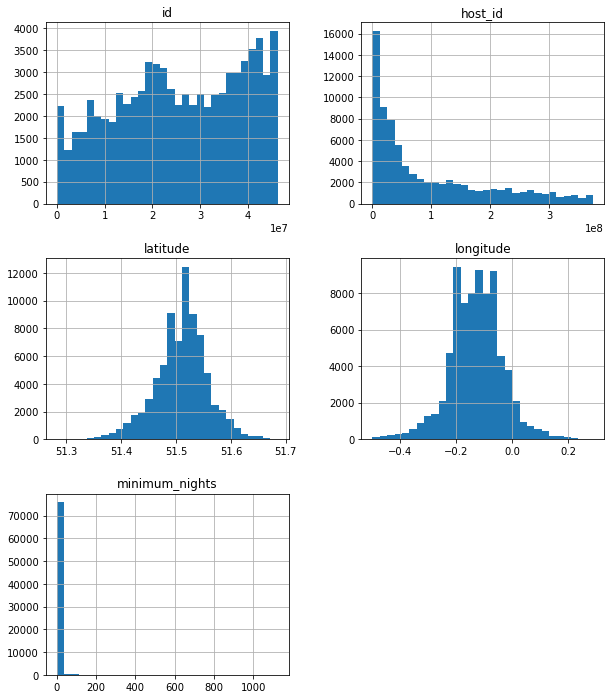

In [16]:
# check for 2020
numeric_cols_hist(s_ab20, width=10, height=12)

Here, density of values in each numeric column is shown.


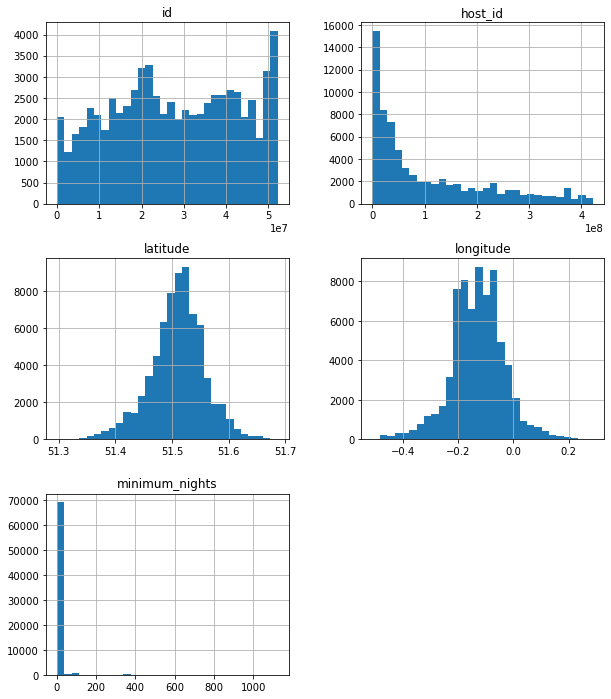

In [17]:
# check for 2021
numeric_cols_hist(s_ab21, width=10, height=12)

Here, density of values in each numeric column is shown.


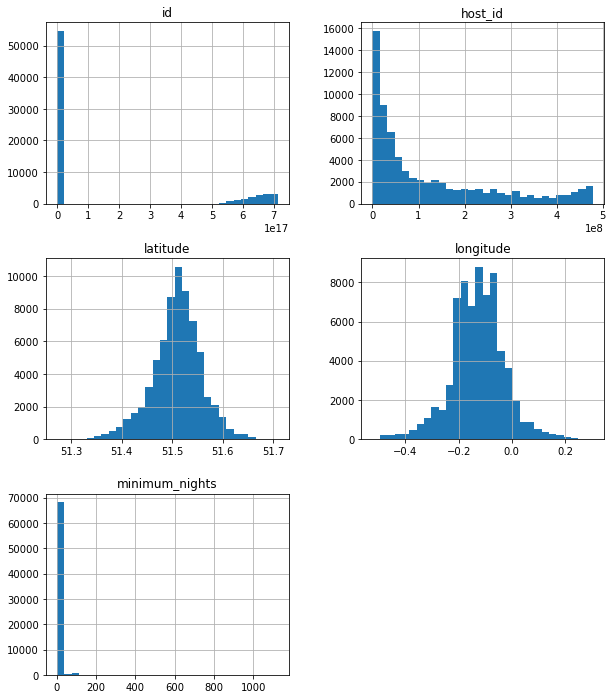

In [18]:
# check for 2022
numeric_cols_hist(s_ab22, width=10, height=12)

so here, all the `price` columns are also in a wrong data type. Change them.

In [19]:
# take price column in 2020 for example to have a look
s_ab20['price']

0         $97.00
1         $40.00
2         $75.00
3        $307.00
4        $150.00
          ...   
76979     $90.00
76980     $87.00
76981     $26.00
76982     $59.00
76983     $44.00
Name: price, Length: 76984, dtype: object

In [20]:
# when we tried the code below, error shows: Unable to parse string "1,000.00" at position 0
# s_ab20['price'] = s_ab20['price'].apply(pd.to_numeric)

# so we still need remove the comma
s_ab20['price'] = s_ab20['price'].str.strip('$')
s_ab20['price'] = s_ab20['price'].str.replace(',','')

s_ab20['price'] = s_ab20['price'].apply(pd.to_numeric)

/tmp/ipykernel_5716/649614484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_ab20['price'] = s_ab20['price'].str.strip('$')
/tmp/ipykernel_5716/649614484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_ab20['price'] = s_ab20['price'].str.replace(',','')
/tmp/ipykernel_5716/649614484.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [21]:
# convert float into int
s_ab20['price'] = s_ab20['price'].astype(int)

# check the datatype now
s_ab20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76984 entries, 0 to 76983
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              76984 non-null  int64  
 1   host_id         76984 non-null  int64  
 2   neighbourhood   47837 non-null  object 
 3   latitude        76984 non-null  float64
 4   longitude       76984 non-null  float64
 5   price           76984 non-null  int64  
 6   minimum_nights  76984 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 4.1+ MB


/tmp/ipykernel_5716/2356152784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_ab20['price'] = s_ab20['price'].astype(int)


In [22]:
def price_to_int(df):
    df['price'] = df['price'].str.strip('$')
    df['price'] = df['price'].str.replace(',', '') #remove comma
    df['price'] = df['price'].apply(pd.to_numeric) # covert to numeric
    df.info() # check

In [23]:
# test this function for 2021
price_to_int(s_ab21)


/tmp/ipykernel_5716/3592577015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.strip('$')
/tmp/ipykernel_5716/3592577015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace(',', '') #remove comma


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70617 entries, 0 to 70616
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              70617 non-null  int64  
 1   host_id         70617 non-null  int64  
 2   neighbourhood   42022 non-null  object 
 3   latitude        70617 non-null  float64
 4   longitude       70617 non-null  float64
 5   price           70617 non-null  float64
 6   minimum_nights  70617 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 3.8+ MB


/tmp/ipykernel_5716/3592577015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].apply(pd.to_numeric) # covert to numeric


In [24]:
# test this function for 2022
price_to_int(s_ab22)

/tmp/ipykernel_5716/3592577015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.strip('$')
/tmp/ipykernel_5716/3592577015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace(',', '') #remove comma


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              69351 non-null  int64  
 1   host_id         69351 non-null  int64  
 2   neighbourhood   39965 non-null  object 
 3   latitude        69351 non-null  float64
 4   longitude       69351 non-null  float64
 5   price           69351 non-null  float64
 6   minimum_nights  69351 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ MB


/tmp/ipykernel_5716/3592577015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].apply(pd.to_numeric) # covert to numeric


plot them again in historgram to check

Here, density of values in each numeric column is shown.


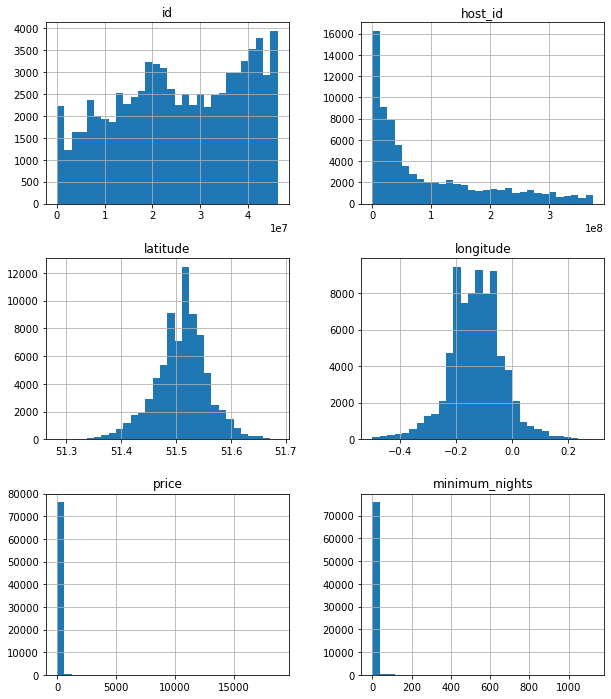

In [25]:
# check for 2020 agian
numeric_cols_hist(s_ab20, width=10, height=12)

Here, density of values in each numeric column is shown.


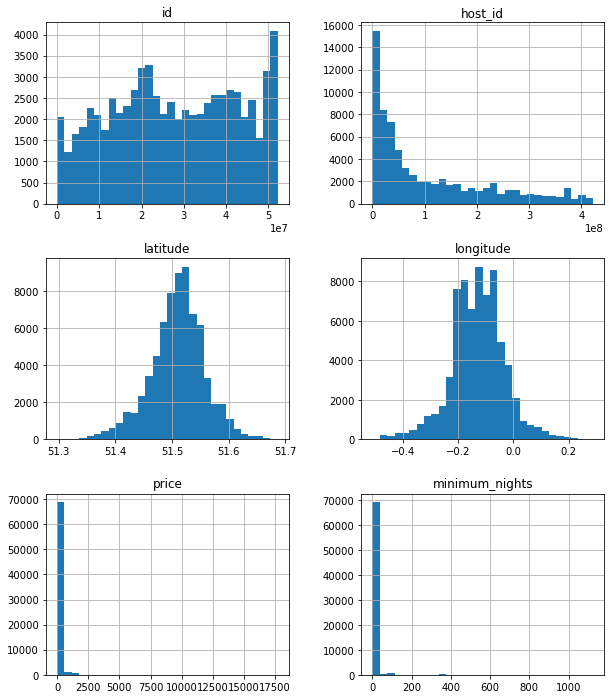

In [26]:
numeric_cols_hist(s_ab21, width=10, height=12)

Here, density of values in each numeric column is shown.


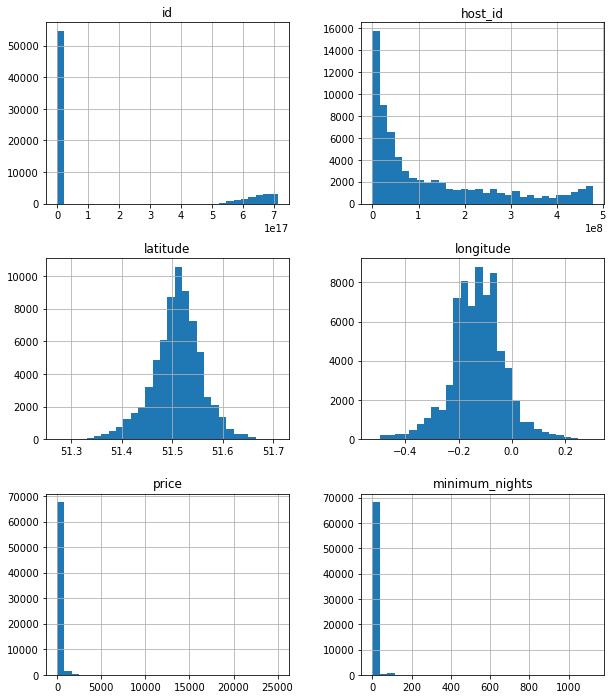

In [27]:
numeric_cols_hist(s_ab22, width=10, height=12)

## 3. Changes of Minimum Stays of Listings

The next step we will have a look at the distributions for each year.

### 3.1 Value Distribution

Histograms for columns to see the value distributions.

### 3.2 Box plot of Minimum Nights

### 3.3 Mapping

Geographical distribution

#### 3.3.1 Load geodata

In [28]:
spath = 'https://github.com/jreades/fsds/blob/master/data/src/' # source path
ddir  = os.path.join('data','geo') # destination directory
water = gpd.read_file( cache_data(spath+'Water.gpkg?raw=true', ddir) )
boros = gpd.read_file( cache_data(spath+'Boroughs.gpkg?raw=true', ddir) )
green = gpd.read_file( cache_data(spath+'Greenspace.gpkg?raw=true', ddir) )

Found data/geo/Water.gpkg locally!
Found data/geo/Boroughs.gpkg locally!
Found data/geo/Greenspace.gpkg locally!


#### 3.3.2 Spatial join

Take data of 2022 as an example first.
Set crs for Inside Airbnb data, and use left join

In [29]:
host = 'http://orca.casa.ucl.ac.uk'
path = '~jreades/data'
gf_ab22 = gpd.read_feather( cache_data(f'{host}/{path}/2022-09-10-listings.geofeather', ddir) )
gf_ab22 = gf_ab22.to_crs(epsg=27700)
gf_ab22 = gf_ab22.drop(columns=['index']).set_index('id')
print(f"Data frame is {gf_ab22.shape[0]:,} x {gf_ab22.shape[1]}")

Found data/geo/2022-09-10-listings.geofeather locally!
Data frame is 68,741 x 31


In [30]:
gf_ab22 = gf_ab22.to_crs('epsg:27700')

In [31]:
gdf_ab22 = gpd.sjoin(gf_ab22, boros, predicate='within', how='left')

# have a look at the columns to check if the spatial join works
print(gdf_ab22.columns.to_list())

['listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 'host_since', 'host_location', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'reviews_per_month', 'geometry', 'index_right', 'NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER']


#### 3.3.3 Find problematic listings and Drop them

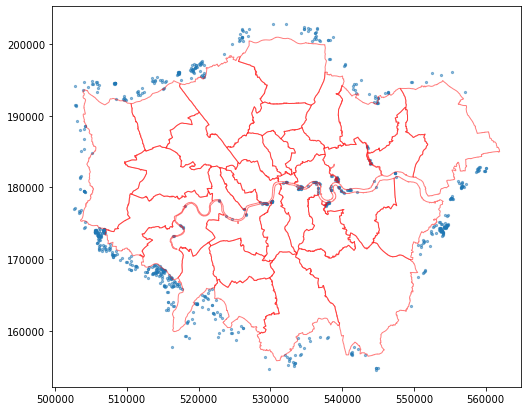

In [32]:
# map these na values on map to work out what happened

ax = gdf_ab22[gdf_ab22.NAME.isna()].plot(figsize=(10,7), markersize=5, alpha=0.5)
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.5);

In [33]:
# remove these na values

gdf_ab22.drop(index=gdf_ab22[gdf_ab22.NAME.isna()].index, axis = 0, inplace=True)
print(f"Data frame is {gdf_ab22.shape[0]:,} x {gdf_ab22.shape[1]}")

Data frame is 67,993 x 37


#### 3.3.4 check the map

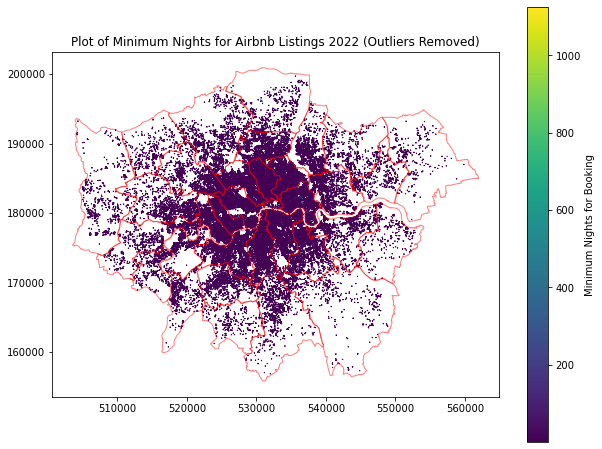

In [34]:
# check the plot
ax = gdf_ab22.plot(figsize = (10, 8), marker='*', markersize=0.25, 
         column = 'minimum_nights', cmap = 'viridis', 
         legend = True, legend_kwds = {'label':'Minimum Nights for Booking'});
ax.set_title("Plot of Minimum Nights for Airbnb Listings 2022 (Outliers Removed)");

boros.plot(ax = ax, edgecolor='r', facecolor='None', alpha=0.5);

legend is wired. check the value of column "minimum_nights"

In [35]:
print(gdf_ab22['minimum_nights'].max())
print(gdf_ab22['minimum_nights'].min())
print(gdf_ab22['minimum_nights'].median())

1125
1
2.0


<div class="alert alert-block alert-warning"><b>Dealing with outliers</b>
    
The value gap is too large and there are discrete points, median value is 2.0 but hte maximum value is 1125.</div>

Check the distribution of the `minimum_nights`.

In [36]:
gdf_ab22.info() # check columns

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 67993 entries, 13913 to 711963908324173056
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   listing_url                67993 non-null  object        
 1   last_scraped               67993 non-null  datetime64[ns]
 2   name                       67972 non-null  object        
 3   description                66739 non-null  object        
 4   host_id                    67993 non-null  int64         
 5   host_name                  67993 non-null  object        
 6   host_since                 67993 non-null  datetime64[ns]
 7   host_location              56234 non-null  object        
 8   host_is_superhost          67993 non-null  bool          
 9   host_listings_count        67993 non-null  int64         
 10  host_total_listings_count  67993 non-null  int64         
 11  host_verifications         67993 non-null 

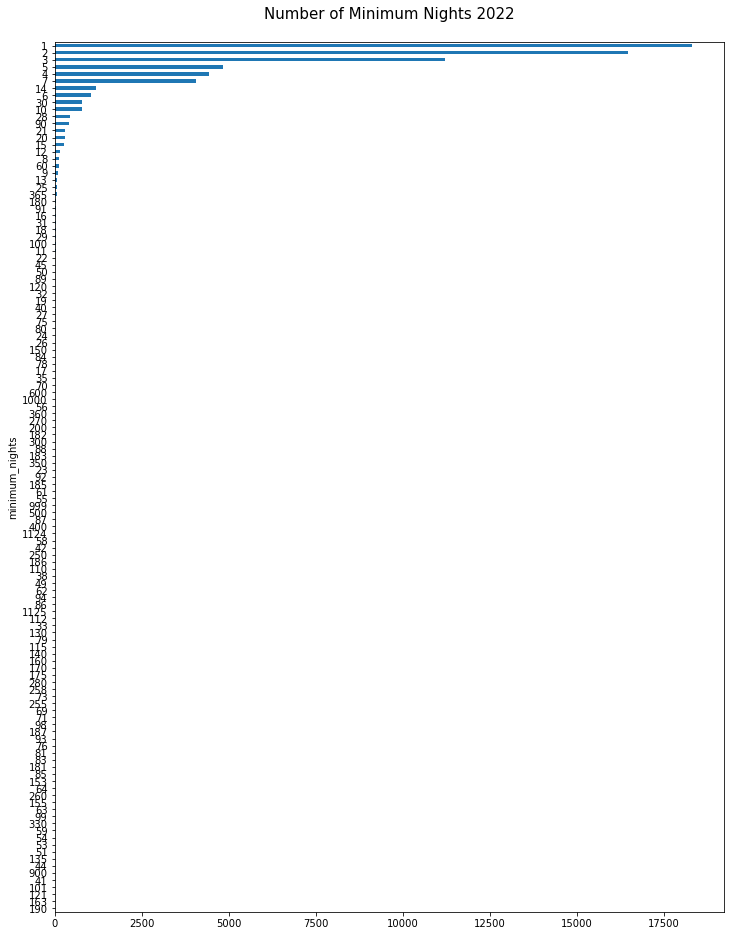

In [37]:
group_by_minnights = (gdf_ab22.groupby('minimum_nights')
                    .agg(count = ('name', 'nunique')) #Return DataFrame with counts of unique elements in each position.
                    .sort_values(by='count', ascending=False))

(group_by_minnights
 .sort_values(by='count')
 .plot(kind='barh', legend=False, figsize=(12,16)))
plt.title('Number of Minimum Nights 2022\n', fontsize=15)
plt.show()

According to the rule, rental under 90 days is considered as short-term, otherwise is long-term. 

So we 're going to divide the listings into two groups: short- and long-term rental.

In [38]:
# selecting them out

long_ab22 = gdf_ab22[~(gdf_ab22['minimum_nights'] <= 90)] # dropping out stays that is no bigger than 90
short_ab22 = gdf_ab22[~(gdf_ab22['minimum_nights'] > 90)]

/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


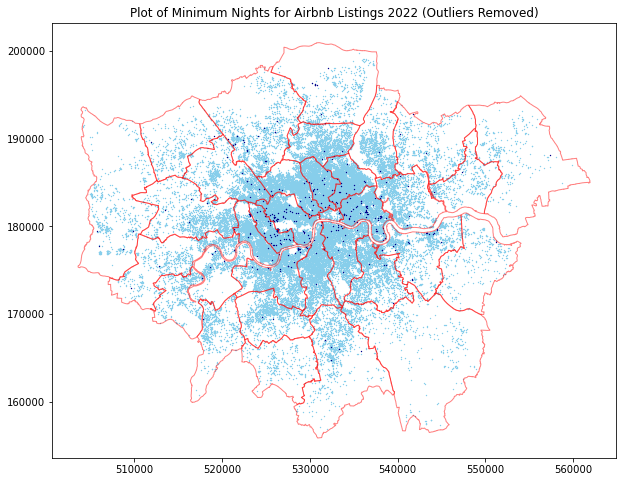

In [39]:
# plot them together


#ax = short_ab22.plot(figsize = (12, 8), marker='*', markersize=0.25, 
#         column = 'minimum_nights', cmap='viridis', 
#         legend=True, legend_kwds={'label':'Short-term Rental of Airbnb Listings 2022'});

fig, ax = plt.subplots(figsize=(12,8))

short_ab22.plot(ax = ax, figsize = (12, 8), marker = '*', markersize=0.25, 
         column = 'minimum_nights', color = 'skyblue', categorical=True);

long_ab22.plot(ax = ax, figsize = (12, 8), marker='*', markersize=0.25, 
         column = 'minimum_nights', color = 'darkblue', categorical=True);

ax.set_title("Plot of Minimum Nights for Airbnb Listings 2022 (Outliers Removed)");

boros.plot(ax = ax, edgecolor='r', facecolor='None', alpha=0.5);

Most of the listings are in short-term (light blue ones), but still some are lont-term rental (see as the dark blue color).

According to the rule, if the longest lease period exceeds 90 days, a contract needs to be signed. Are these lists illegal? Or they just haven't changed the available time?

<div class="alert alert-block alert-warning"><b>Possible Problem: lacking geospatial files</b>
    
Here we can only get the feather file for 2022 data. So for the rest, we can use another way to plot them into scatter maps.</div>

### 3.4 Plot scatter map for data in 2019-2021
Check their distributions, to see the listings that have the same stays

#### 3.4.1 2019

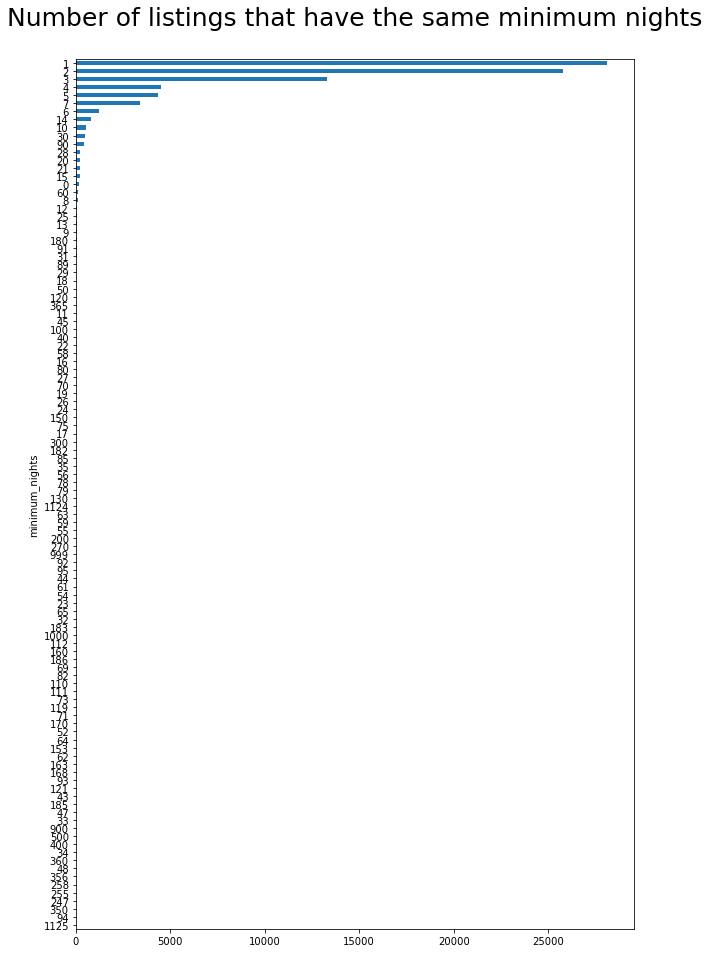

In [40]:
groupby_stays19 = (s_ab19
                             .groupby('minimum_nights')
                             .agg(count=('id', 'nunique'))
                            .sort_values(by='count', ascending=False))

(groupby_stays19
 .sort_values(by='count')
 .plot(kind='barh', legend=False, figsize = (10, 16)))
plt.title('Number of listings that have the same minimum nights\n', fontsize=25)
plt.show()

Most of the listings have 1 night stays for minimum nights. And many are under 7 nights.

Using `seabon` for this plotting.

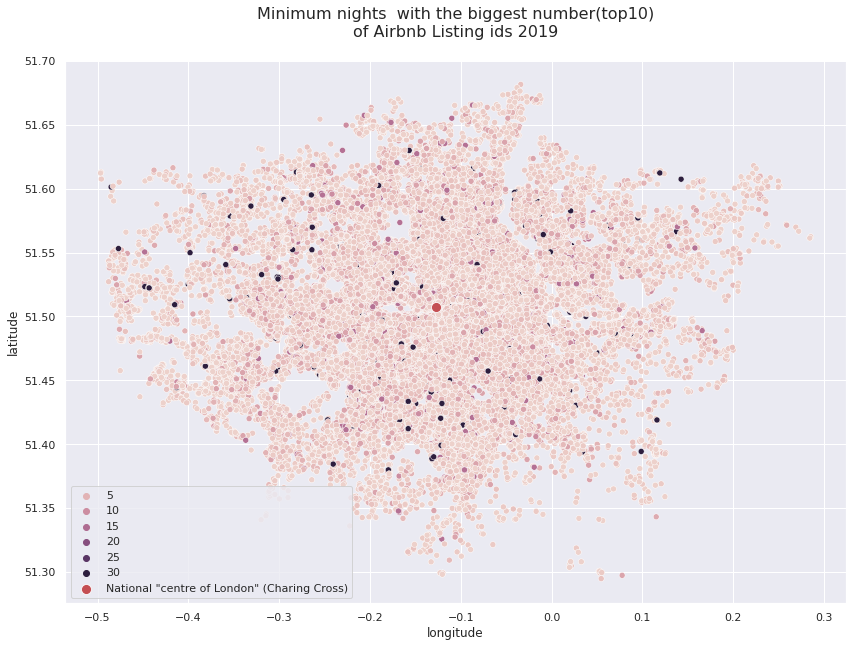

In [41]:
sns.set(rc={'figure.figsize':(14,10)})
sns.scatterplot(data=s_ab19.query("minimum_nights in @groupby_stays19.head(10).index"),
                y='latitude',x='longitude',hue='minimum_nights')

sns.scatterplot(x=[-0.1277], y=[51.5075], s=100, color='r', label='National "centre of London" (Charing Cross)')

plt.title('Minimum nights  with the biggest number(top10)\nof Airbnb Listing ids 2019\n', fontsize=16)
plt.show()

In [42]:
# divide long- and short- term

long_ab19 = s_ab19[~(s_ab19['minimum_nights'] <= 90)] # dropping out stays that is no bigger than 90
short_ab19 = s_ab19[~(s_ab19['minimum_nights'] > 90)]

#### 3.4.2 2020

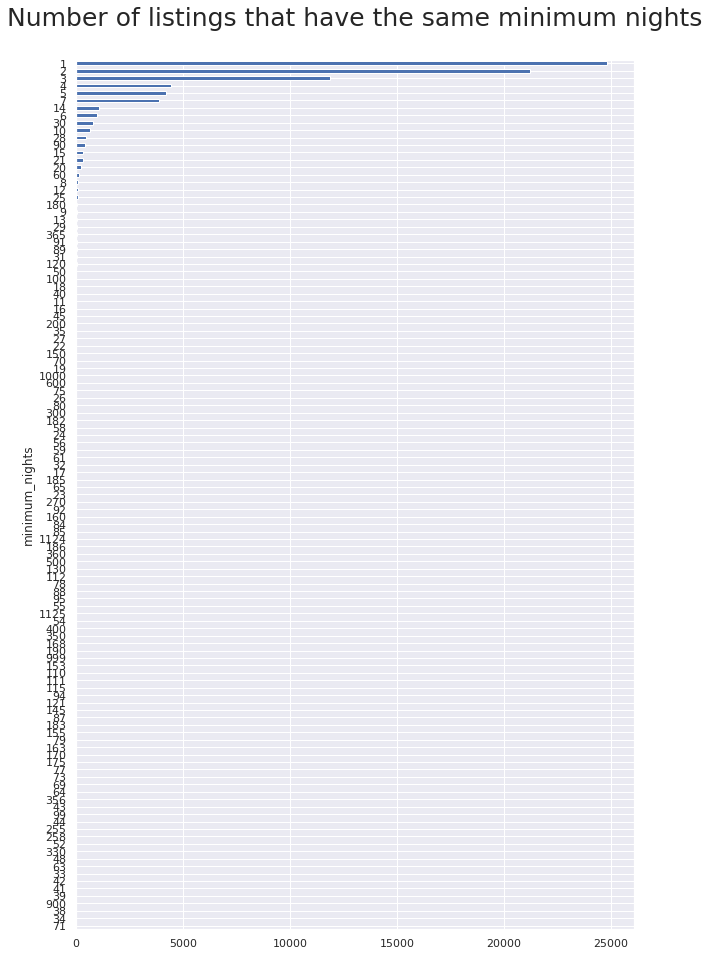

In [43]:
groupby_stays20 = (s_ab20
                             .groupby('minimum_nights')
                             .agg(count=('id', 'nunique'))
                            .sort_values(by='count', ascending=False))

(groupby_stays20
 .sort_values(by='count')
 .plot(kind='barh', legend=False, figsize = (10, 16)))
plt.title('Number of listings that have the same minimum nights\n', fontsize=25)
plt.show()

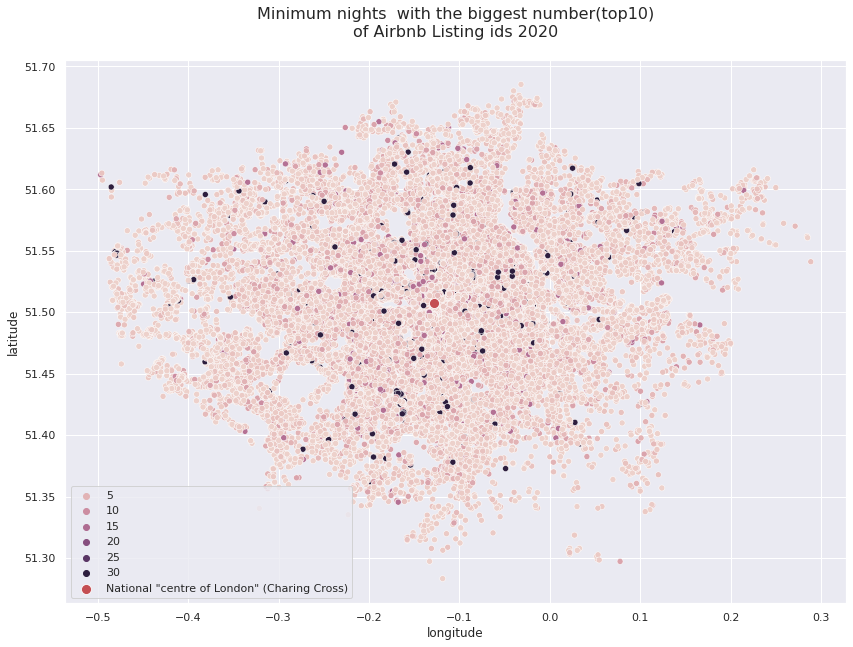

In [44]:
sns.set(rc={'figure.figsize':(14,10)})
sns.scatterplot(data=s_ab20.query("minimum_nights in @groupby_stays20.head(10).index"),
                y='latitude',x='longitude',hue='minimum_nights')

sns.scatterplot(x=[-0.1277], y=[51.5075], s=100, color='r', label='National "centre of London" (Charing Cross)')

plt.title('Minimum nights  with the biggest number(top10)\nof Airbnb Listing ids 2020\n', fontsize=16)
plt.show()

#### 3.4.3 2021

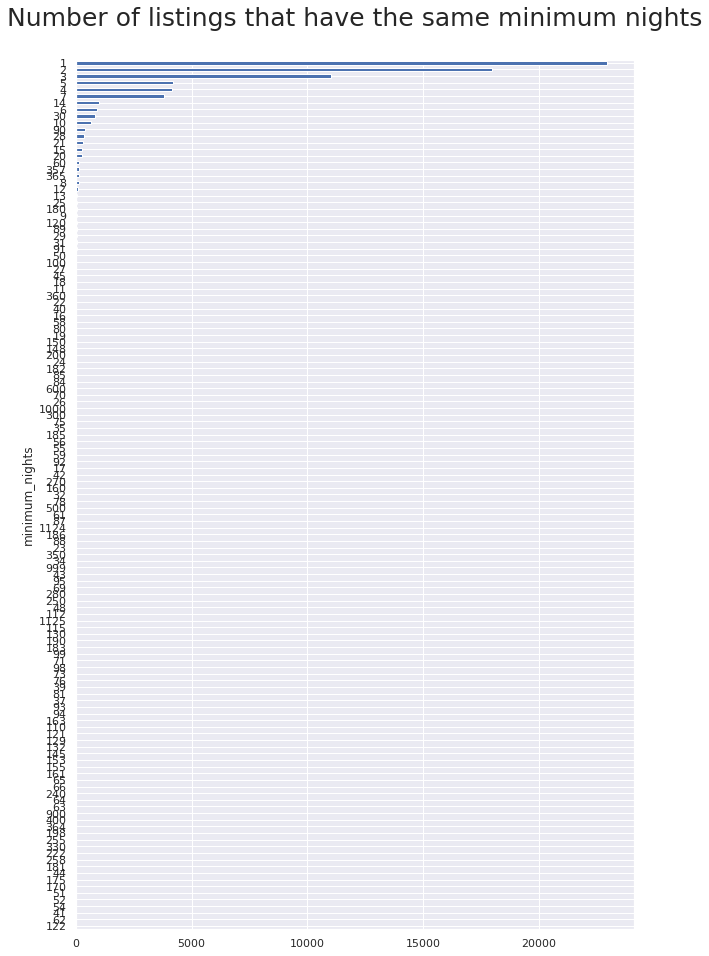

In [48]:
groupby_stays21 = (s_ab21
                             .groupby('minimum_nights')
                             .agg(count=('id', 'nunique'))
                            .sort_values(by='count', ascending=False))

(groupby_stays21
 .sort_values(by='count')
 .plot(kind='barh', legend=False, figsize = (10, 16)))
plt.title('Number of listings that have the same minimum nights\n', fontsize=25)
plt.show()

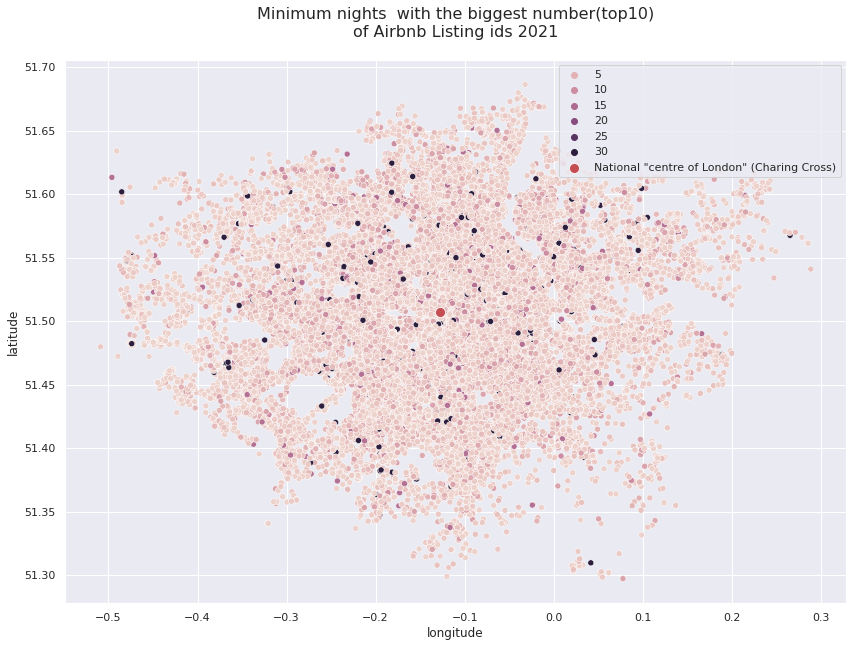

In [49]:
sns.set(rc={'figure.figsize':(14,10)})
sns.scatterplot(data=s_ab21.query("minimum_nights in @groupby_stays21.head(10).index"),
                y='latitude',x='longitude',hue='minimum_nights')

sns.scatterplot(x=[-0.1277], y=[51.5075], s=100, color='r', label='National "centre of London" (Charing Cross)')

plt.title('Minimum nights  with the biggest number(top10)\nof Airbnb Listing ids 2021\n', fontsize=16)
plt.show()

#### 3.4.3 Scatterplot for 2022

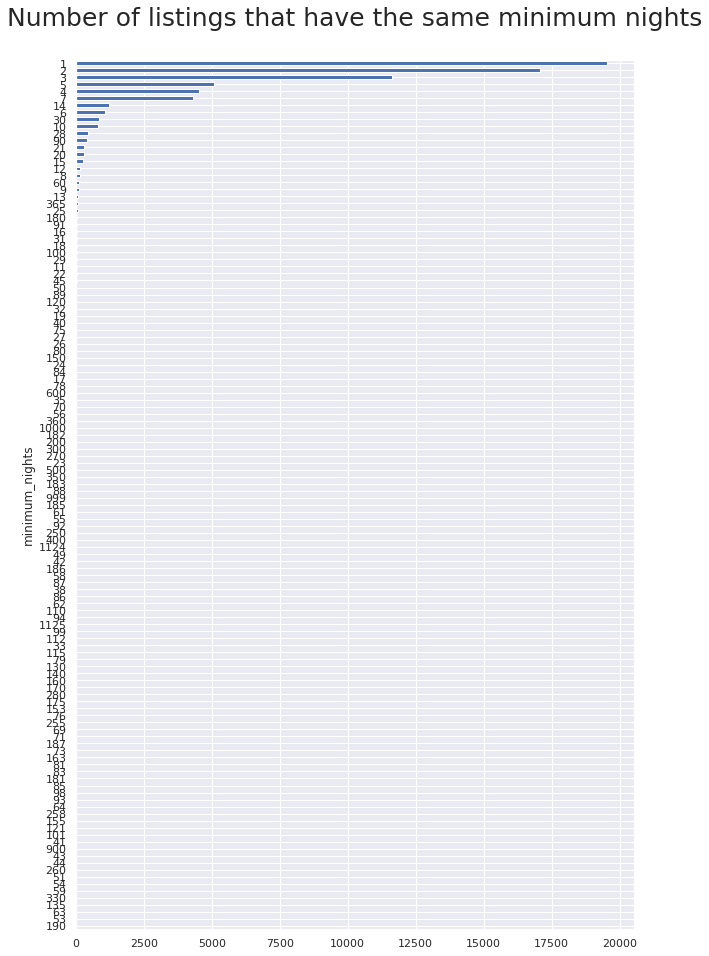

In [50]:
groupby_stays22 = (s_ab22
                             .groupby('minimum_nights')
                             .agg(count=('id', 'nunique'))
                            .sort_values(by='count', ascending=False))

(groupby_stays22
 .sort_values(by='count')
 .plot(kind='barh', legend=False, figsize = (10, 16)))
plt.title('Number of listings that have the same minimum nights\n', fontsize=25)
plt.show()

### Results

3.2 + 3.3 xxxxxxxxxx

## 4. Entry to/ Exit Listings from the Airbnb marketplace